In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\saias\Desktop\project-1\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.isnull().sum() #No Missing Values

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.duplicated().sum()#No Duplicates

0

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
df.info() #Summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df['Gender'] = np.where(df['Gender']=='Male',1,0)

In [8]:
df.drop('CustomerID',axis=1,inplace=True) #Unwanted Column

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [10]:
df.describe()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,0.440000,38.850000,60.560000,50.200000
std,0.497633,13.969007,26.264721,25.823522
min,0.000000,18.000000,15.000000,1.000000
25%,0.000000,28.750000,41.500000,34.750000
50%,0.000000,36.000000,61.500000,50.000000
75%,1.000000,49.000000,78.000000,73.000000
max,1.000000,70.000000,137.000000,99.000000


<Axes: >

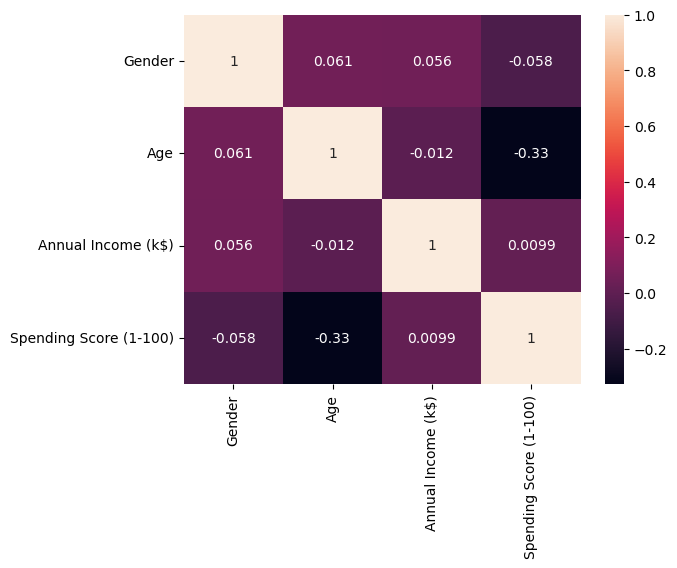

In [11]:
sns.heatmap(df.corr(),annot=True)

Text(0, 0.5, 'Spending Score of customer')

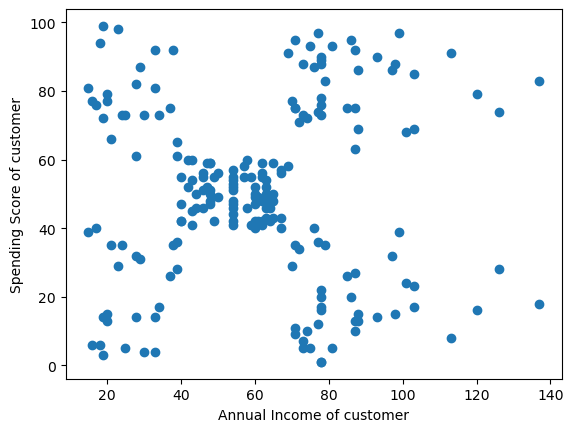

In [12]:
plt.scatter(df['Annual Income (k$)'],df['Spending Score (1-100)'])
plt.xlabel('Annual Income of customer')
plt.ylabel('Spending Score of customer')

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data=df[['Age','Annual Income (k$)','Spending Score (1-100)']]
df[['Age','Annual Income (k$)','Spending Score (1-100)']] = scaler.fit_transform(data) # Scaling the data

In [14]:
from sklearn.cluster import KMeans
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(km.inertia_) #for Sum of Squared Error

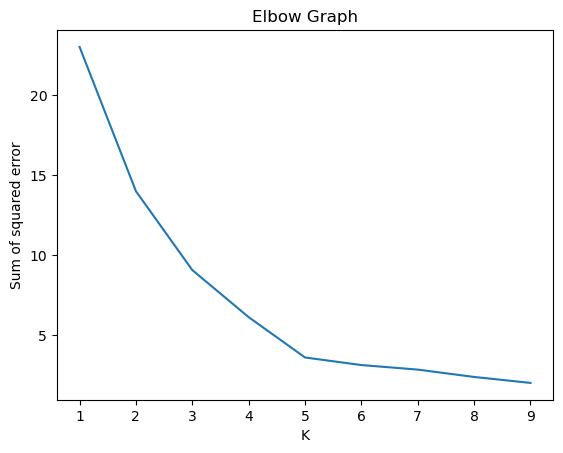

In [15]:
plt.title('Elbow Graph')
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

#**Observation: In this Elbow Method graph, we find that the optimal value of K is 5.**

In [16]:
k = KMeans(n_clusters=5)
y_predict = k.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)']])
y_predict

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [17]:
df['Clusters'] = y_predict
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0.019231,0.000000,0.387755,3
1,1,0.057692,0.000000,0.816327,4
2,0,0.038462,0.008197,0.051020,3
3,0,0.096154,0.008197,0.775510,4
4,0,0.250000,0.016393,0.397959,3


In [18]:
k.cluster_centers_ #Centroids

array([[0.32695811, 0.49533888],
       [0.59631148, 0.16921769],
       [0.58638083, 0.82783883],
       [0.08792846, 0.19619666],
       [0.08792846, 0.79962894]])

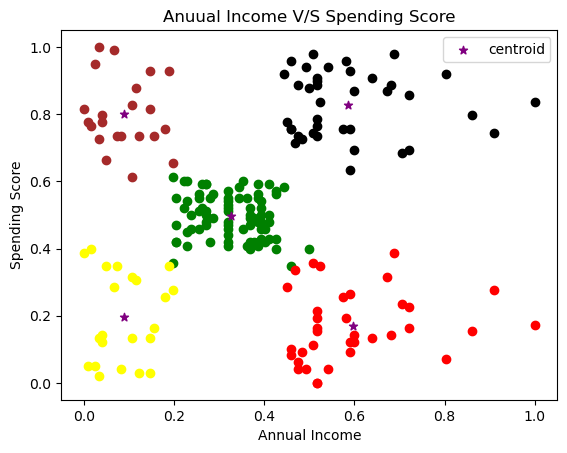

In [19]:
df1 = df[df.Clusters==0]
df2 = df[df.Clusters==1]
df3 = df[df.Clusters==2]
df4 = df[df.Clusters==3]
df5 = df[df.Clusters==4]
plt.scatter(df1['Annual Income (k$)'],df1['Spending Score (1-100)'],color='green')
plt.scatter(df2['Annual Income (k$)'],df2['Spending Score (1-100)'],color='red')
plt.scatter(df3['Annual Income (k$)'],df3['Spending Score (1-100)'],color='black')
plt.scatter(df4['Annual Income (k$)'],df4['Spending Score (1-100)'],color='yellow')
plt.scatter(df5['Annual Income (k$)'],df5['Spending Score (1-100)'],color='brown')
plt.scatter(k.cluster_centers_[:,0],k.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Anuual Income V/S Spending Score')
plt.legend()

#**Conclusion :**
#**So, here we have formed 5 clusters:**
------------

#**Cluster 1 (Brown):   These customers have a low annual income but a high spending score. Therefore, we can suggest a few products to these customers.**
------------

#**Cluster 2 (Red):   These customers have both a low annual income and a low spending score. Thus, we likely can't suggest many products to these customers.**
----------

#**Cluster 3 (Black): These customers have a medium annual income and a medium spending score. Hence, we can suggest a moderate number of products to these customers.**
--------

#**Cluster 4 (Green): These customers have a high annual income and a high spending score. Consequently, we don't need to suggest many products to these customers.**

---------

#**Cluster 5 (Yellow): These customers have a high annual income but a low spending score. Therefore, we should suggest more products to these customers.**

#**Testing Part.**

In [20]:
inputs = pd.DataFrame([[1,19,15,39],[0,20,20,69],[1,20,30,80]])
inputs #Inputs

,0,1,2,3
0,1,19,15,39
1,0,20,20,69
2,1,20,30,80


In [21]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(inputs)
output = kmeans.predict(inputs)
print("Inputs: ",inputs)
print("Output: ",output) #Inputs & its Outputs

Inputs:     0   1   2   3
0  1  19  15  39
1  0  20  20  69
2  1  20  30  80
Output:  [1 0 2]


In [22]:
import pickle
from sklearn.cluster import KMeans

# Assuming 'kmeans_model' is your trained model
# Example: kmeans_model = KMeans(n_clusters=5, random_state=42).fit(X)

# Save the trained model
with open(r'C:\Users\saias\Desktop\project-1\model\model.pkl', 'wb') as file:
    pickle.dump(kmeans, file)

print("K-Means model saved as 'kmeans_model.pkl'")


K-Means model saved as 'kmeans_model.pkl'
